# PRINCIPAL COMPONENET ANALYSIS (PCA)

* PCA is a method used to reduce number of variables in your data by extracting important one from a large pool. 
 
* It reduces the dimension of your data with the aim of retaining as much information as possible.

# About the dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

Boston House Prices dataset
===========================

Data Set Characteristics:
-------------------------
=> Number of Instances: 506
        
=> Number of Attributes: 13 numeric/categorical predictive

=> Median Value (attribute 14) is usually the target
    
    :Attribute Information (in order):
    
    1.CRIM per capita crime rate by town
    
    2.ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    
    3.INDUS proportion of non-retail business acres per town
    
    4.CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    
    5.NOX nitric oxides concentration (parts per 10 million)
    
    6.RM average number of rooms per dwelling
    
    7.AGE proportion of owner-occupied units built prior to 1940
    
    8.DIS weighted distances to five Boston employment centres
    
    9.RAD index of accessibility to radial highways
    
    10.TAX full-value property-tax rate per $10,000
    
    11.PTRATIO pupil-teacher ratio by town
    
    12.B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    
    13.LSTAT % lower status of the population
     
    14.MEDV Median value of owner-occupied homes in $1000's
    
=> Missing Attribute Values: None


# Our Task in this dataset

  * Data Loading
  * Exploratory Data Analysis
  * Standardization of data
  * Appling PCA

In [93]:
## Import Libraries needed to load the data

import pandas as pd 
from sklearn.datasets import load_boston


In [94]:
## Load the data from sklearn module
## Format function represent formated representation of values(0,1).

boston = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

print('Shape of Data is : {} rows and {} columns'.format(boston.shape[0],boston.shape[1]))

Shape of Data is : 506 rows and 13 columns


In [95]:
## Making a new column of price which set as target variable("Y")
## Dropping the price (Yi) column from the bunch of features which is present at Xi

boston['PRICE'] = load_boston().target  
X = boston.drop('PRICE', axis = 1)      
Y = boston['PRICE']

In [96]:
boston.shape   ## Train data

(506, 14)

In [97]:
boston["PRICE"].shape  ## Test Data

(506,)

In [98]:
## Name of the features which is present in our dataset.

print(load_boston().feature_names) 


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [99]:
## Here are the Prices of Boston Houses.

print(load_boston().target) 


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [100]:
boston.head()     ## Checking first five rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
# Lets look at the null values of the data
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Observation :
### So here we do not found any NULL values which good for our dataset.

In [102]:
# Lets look at the datatype of the features
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

# Exploratory Data Analysis

In [103]:
# import libraries needed to do EDA
import matplotlib.pyplot as plt
import seaborn as sns

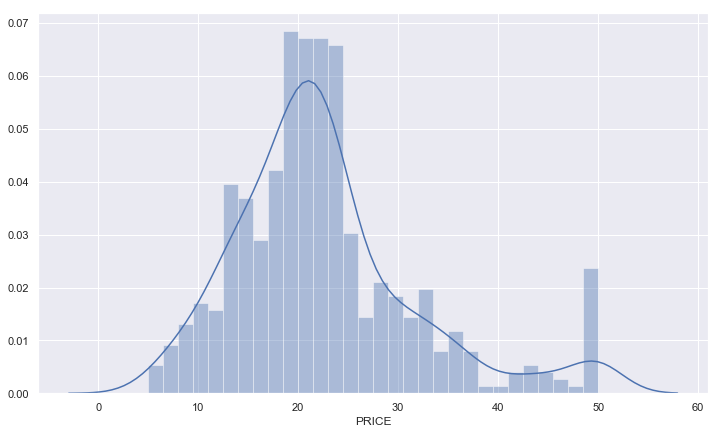

In [104]:
# Plot distribution graph for target value 'MEDV'
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(boston['PRICE'], bins=30)
plt.show()

### Observation :
### Here we seen that the PRICE feature is having a large varinace (spreadness of the curve)

In [105]:
sns.pairplot(boston, x_vars=['RM','LSTAT','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE'], y_vars='PRICE', size=50, aspect=0.27, kind='reg')

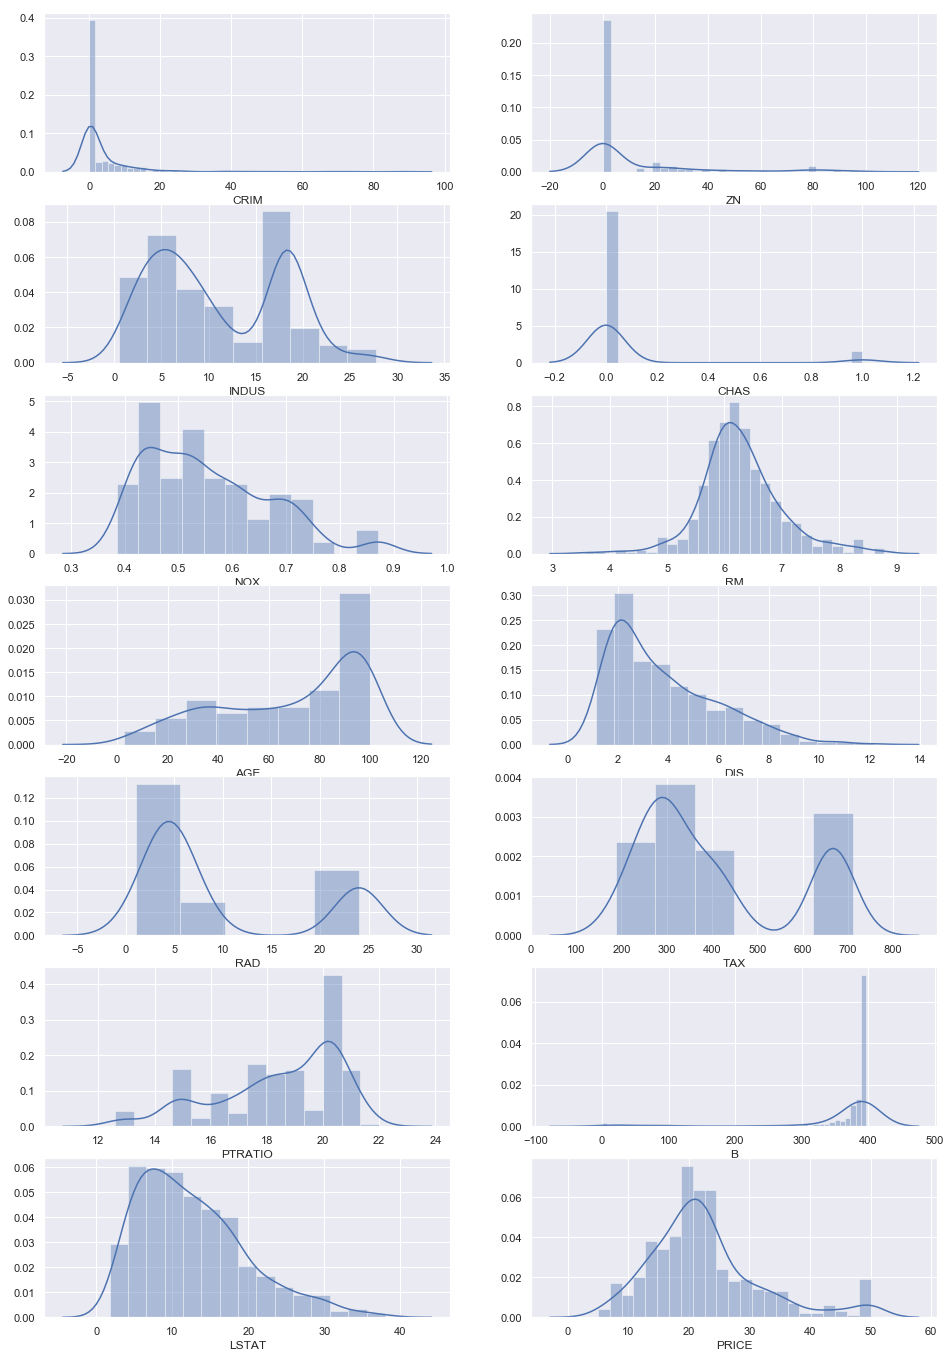

In [106]:
# Lets look at the distribution plot of the features

pos = 1
fig = plt.figure(figsize=(16,24))
for i in boston.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(boston[i],ax=ax)

### Observation :
### Here we seen that the RM and Prices are having almost same normal distribution which shows that this feature(RM ) is more relevant to the PRICE

In [107]:
# lets look at some descriptive stats of our features

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scale of our features are very different from each other, therefore we might have to rescale our data to improve our data quality, 


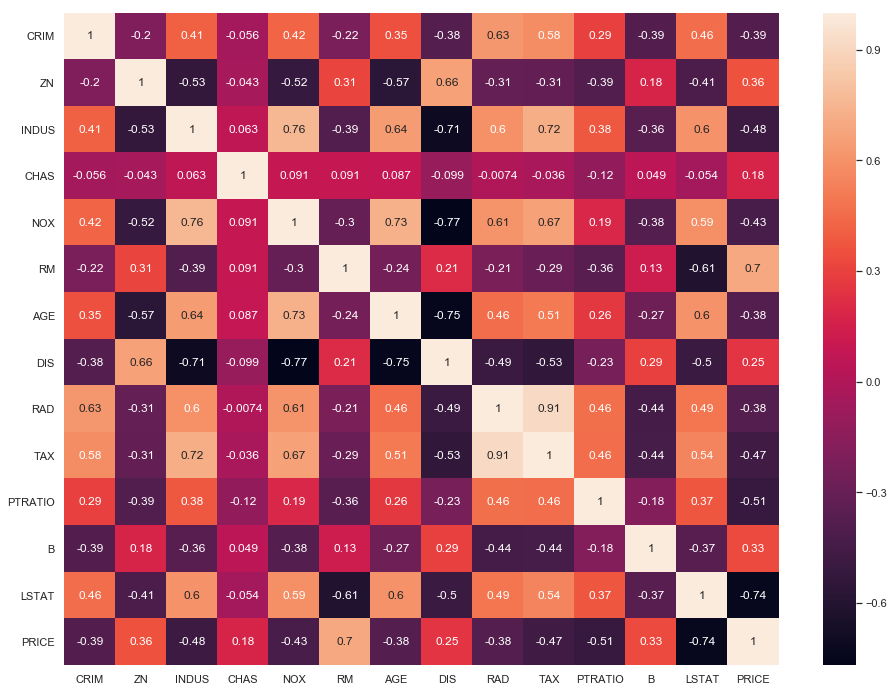

In [108]:
# Lets look at the correlation matrix of our data.

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(boston.corr(),annot=True)

### Observation :
### Our target variable, seems to be highly correlated, with LSTAT and RM, which makes sense, as these two are very important factors for house pricing, but there seems to be a lot of multicollinearity as well.

### This is not good, as multicollinearity can make our model unstable.

## Standardization of data

In [109]:
# Lets build our function which will perform the standardization
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [110]:
# We will build a new dataframe
boston_std = pd.DataFrame(columns=boston.columns)
for i in boston.columns:
    boston_std[i] = rescale(boston[i])

In [111]:
# Lets look at the descriptive stats now
boston_std.describe().iloc[1:5:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
mean,-1.123388e-16,4.037175e-17,3.089316e-16,-3.510587e-17,-2.527622e-16,-9.478584e-17,-1.685082e-16,-1.404235e-16,0.000000,5.616939e-17,-4.212704e-16,-7.021173e-16,-3.229740e-16,-5.476515e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-0.981871,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00,-1.906340e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-0.637331,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01,-5.988631e-01


## Shape of Data does not changes when rescaling, it just scales the data to give mean at 0, and standard deviation as 1 for all the features

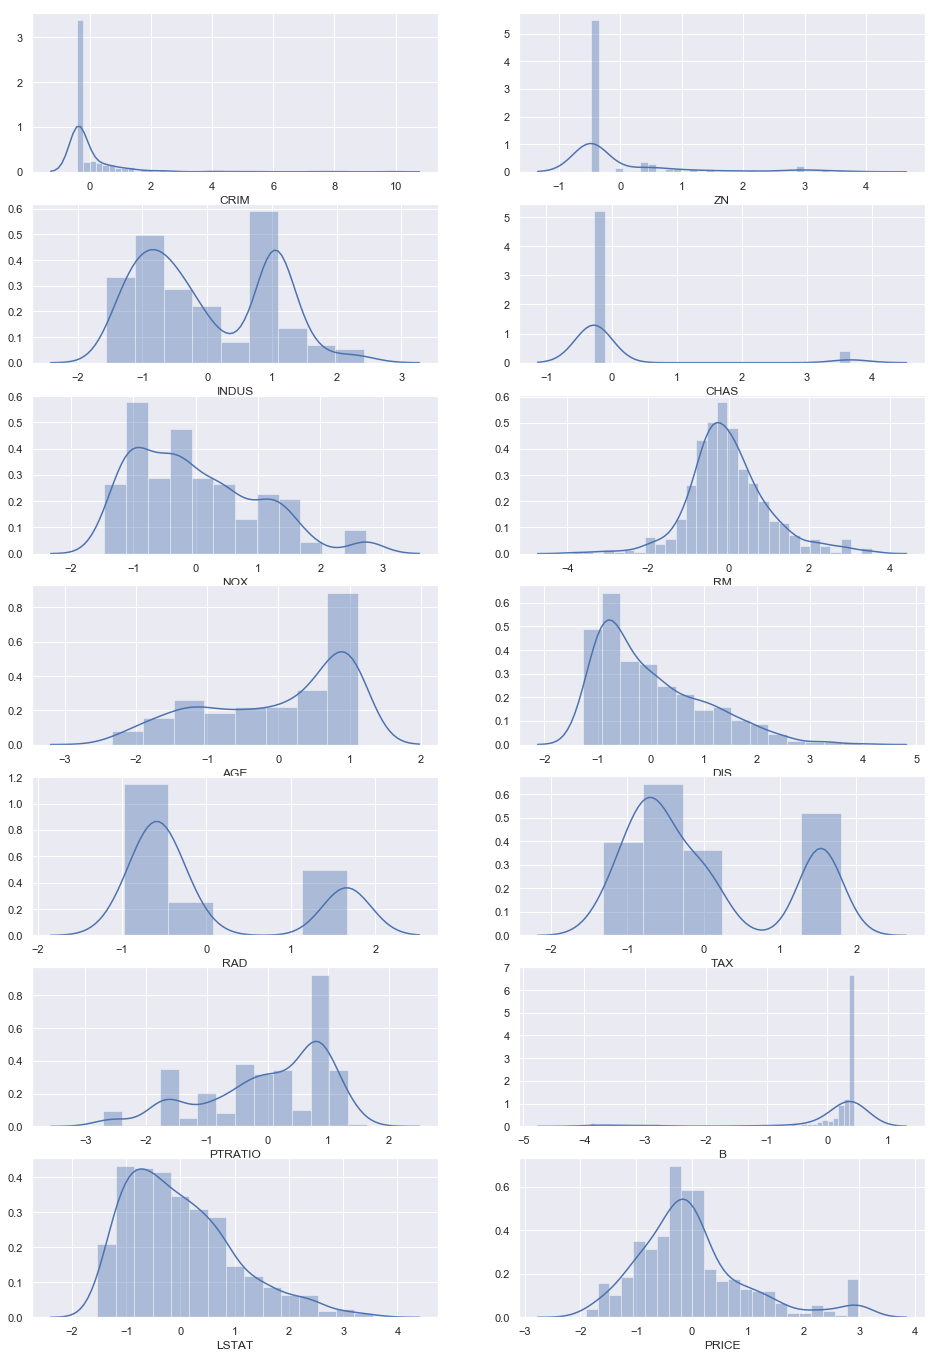

In [112]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in boston_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(boston_std[i],ax=ax)
    

### Observation :
### Here we do not see any changes in the distribution curves so we easily said that by normalizing the data there is no changes in the distibution curves.

# Principal Component Analysis

In [113]:
### import libraries for PCA
from sklearn.decomposition import PCA

In [114]:
### Dropping all the unrelevant features and just take two features(n_components) and analyse the data.  

pca = PCA(n_components=2) 
X = boston_std.drop('PRICE',axis=1)
X_pca = pca.fit_transform(X)
boston_std_pca = pd.DataFrame(X_pca,columns=['RM','LSTAT'])
boston_std_pca['PRICE'] = boston_std['PRICE']

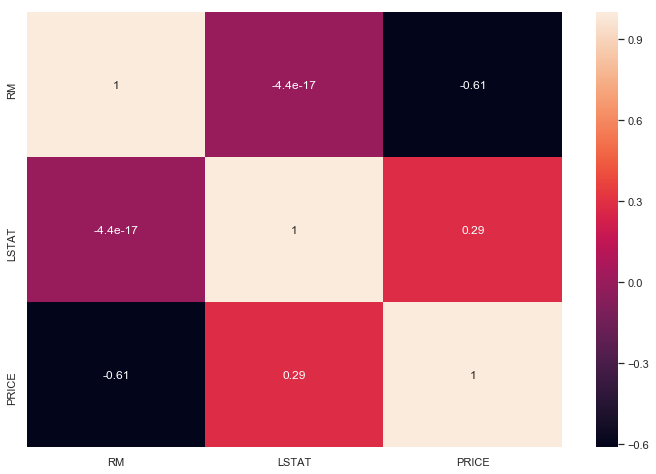

In [115]:
### Lets look at the correlation matrix now.
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(boston_std_pca.corr(),annot=True)


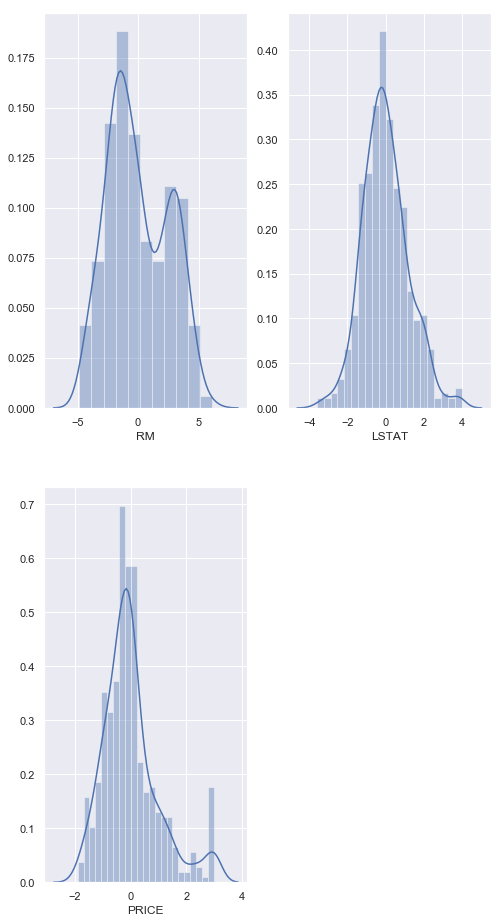

In [116]:
### Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(8,16))
for i in boston_std_pca.columns:
    ax = fig.add_subplot(2,2,pos)
    pos = pos + 1
    sns.distplot(boston_std_pca[i],ax=ax)

### Observation :
### Here see those two features(RM , LSTAT) which are more relevant to our target variable (PRICE) and these and having almost same distribution like PRICE.
    

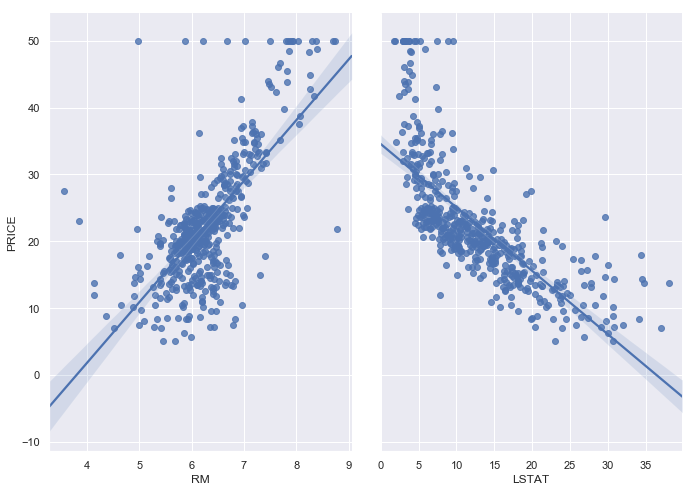

In [118]:
sns.pairplot(boston, x_vars=['RM','LSTAT'], y_vars='PRICE', size=7, aspect=0.7, kind='reg')


### Observation :
### Here we seen the scatterplot which also tells us the same result that the features which we are taken is very much relevant to our Target variable(Price) because as you can see that the line which is passing is having so many points on that and some points are act as an ouliers.

# Conclusion :

### Principal component analysis playing a good role in dimensionality reduction as we can seen the above observation itcan take out relevant features (RM , LSTAT).

